In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error,accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("census.csv",na_values="?",skipinitialspace=True)


In [3]:
#Task1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.isnull().sum()
        

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education       45222 non-null  object
 4   education-num   45222 non-null  int64 
 5   marital-status  45222 non-null  object
 6   occupation      45222 non-null  object
 7   relationship    45222 non-null  object
 8   race            45222 non-null  object
 9   sex             45222 non-null  object
 10  capital-gain    45222 non-null  int64 
 11  capital-loss    45222 non-null  int64 
 12  hours-per-week  45222 non-null  int64 
 13  native-country  45222 non-null  object
 14  income          45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [7]:
df["income"].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [8]:
df["income"]=df["income"].map({"<=50K":0,">50K":1})
df["income"].value_counts()

0    34014
1    11208
Name: income, dtype: int64

In [9]:
#Task2: Data Manipulation
#a
census_ed=df["education"]
#b
census_seq=df.iloc[:,:8]
#c
census_col=df.iloc[:,5:12:3]
#d
male_gov=df[(df["sex"]=="Male")&(df["workclass"]=="State-gov")]
#e
census_us=df[(df["age"]==39)&((df["education"]=="Bachelors")|(df["native-country"]=="United-States"))]
#f
census_200=df.sample(n=200)
#g
df["workclass"].value_counts()

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

In [10]:
#h
workclass_group=df.groupby(by=["workclass"])
workclass_group["capital-gain"].mean()

workclass
Federal-gov          924.485064
Local-gov            766.129032
Private              886.123127
Self-emp-inc        5053.619077
Self-emp-not-inc    1800.606955
State-gov            750.135149
Without-pay          325.238095
Name: capital-gain, dtype: float64

In [11]:
#i
df_income_more_fiftyk=df[df["income"]==1]
#j
df[(df["workclass"]=="Private")&(df["native-country"]=="United-States")&(df["income"]==0)].shape[0]*100/df.shape[0]

51.70049975675556

In [12]:
#k
df[(df["marital-status"]=="Married-civ-spouse")|(df["marital-status"]=="Married-spouse-absent")|(df["marital-status"]=="Married-AF-spouse")].shape[0]*100/df.shape[0]

47.850603688470216

In [13]:
#l
df[(df["education"]=="HS-grad")&(df["income"]==1)].shape[0]*100/df.shape[0]

5.342532395736589

In [14]:
#Task3: Linear Regression
x=df["education-num"]
y=df["hours-per-week"]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)


In [15]:
lin_model=LinearRegression()
lin_model.fit(X_test,y_test)
y_train_pred=lin_model.predict(X_train)
rmse=np.sqrt(mean_squared_error(y_train,y_train_pred))
print("Root mean square error:",round(rmse,3))

Root mean square error: 11.889


In [16]:
#Task 4: Logistic Regression
#a
occ_df=pd.get_dummies(df["occupation"],drop_first=True)

In [17]:
x=occ_df
y=df["income"]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=42)


In [18]:
lg_reg=LogisticRegression()
lg_reg.fit(X_train,y_train)
y_test_pred=lg_reg.predict(X_test)


In [19]:
print("Confusion matrix:\n",confusion_matrix(y_test,y_test_pred))
print("Accuracy of a model:",accuracy_score(y_test,y_test_pred))


Confusion matrix:
 [[11914     0]
 [ 3914     0]]
Accuracy of a model: 0.7527167045741724


In [20]:
#b
x=df[["age", "workclass", "education"]]
cat_x=x[["workclass", "education"]]
vat_to_num=pd.get_dummies(cat_x,drop_first=True)
x=x.drop(columns=["workclass", "education"])


In [21]:
x=pd.concat([x,vat_to_num],axis=1)
y=df["income"]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [22]:
lg_reg=LogisticRegression()
lg_reg.fit(X_train,y_train)
y_test_pred=lg_reg.predict(X_test)

In [23]:
print("Confusion matrix:\n",confusion_matrix(y_test,y_test_pred))
print("Accuracy of a model:",accuracy_score(y_test,y_test_pred))

Confusion matrix:
 [[6465  377]
 [1550  653]]
Accuracy of a model: 0.7869541182974019


In [24]:
#Task 5:
df["sex"]=df["sex"].map({"Male":0,"Female":1})

In [25]:

cat_df=df.select_dtypes(include=object)
cat_df

,workclass,education,marital-status,occupation,relationship,race,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,United-States
5,Private,10th,Never-married,Other-service,Not-in-family,White,United-States
...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,United-States
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,United-States
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,United-States
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,United-States


In [26]:
cat_to_num=pd.get_dummies(cat_df,drop_first=True)


In [27]:
df.drop(list(cat_df.columns),axis=1,inplace=True)

In [28]:
df=pd.concat([df,cat_to_num],axis=1)

In [29]:
y=df["income"]
x=df.drop(["income"],axis=1)

In [30]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [31]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
df_cf=tree.DecisionTreeClassifier()
df_cf.fit(X_train,y_train)
y_test_pred=df_cf=df_cf.predict(X_test)

In [32]:
print("Confusion matrix:\n",confusion_matrix(y_test,y_test_pred))
print("Accuracy of a model:",accuracy_score(y_test,y_test_pred))

Confusion matrix:
 [[8917 1324]
 [1265 2061]]
Accuracy of a model: 0.8091693078794133


In [33]:
#Task6
from sklearn.ensemble import RandomForestClassifier
ran_ft = RandomForestClassifier(n_estimators=300)
ran_ft.fit(X_train, y_train)



RandomForestClassifier(n_estimators=300)

In [34]:
predictions = ran_ft.predict(X_test)
print("Accuracy: %s%%" % (100*accuracy_score(y_test, predictions)))
print(confusion_matrix(y_test, predictions))

Accuracy: 85.11830176162748%
[[9470  771]
 [1248 2078]]


In [36]:
#Task7
pop_df=pd.read_csv("popdata.csv")
pop_df.head()

,value,date
0,127299.0,1952-01-01
1,127517.0,1952-02-01
2,127721.0,1952-03-01
3,127933.0,1952-04-01
4,128130.0,1952-05-01


In [37]:
pop_df.describe()

,value
count,816.000000
mean,214837.767826
std,50519.140567
min,127299.000000
25%,172715.250000
50%,210547.500000
75%,260354.250000
max,301299.946000


In [38]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   816 non-null    float64
 1   date    816 non-null    object 
dtypes: float64(1), object(1)
memory usage: 12.9+ KB


In [41]:
from datetime import datetime
pop_df["date"]=pd.to_datetime(pop_df["date"])
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   value   816 non-null    float64       
 1   date    816 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.9 KB


In [42]:
pop_df.isnull().sum()

value    0
date     0
dtype: int64

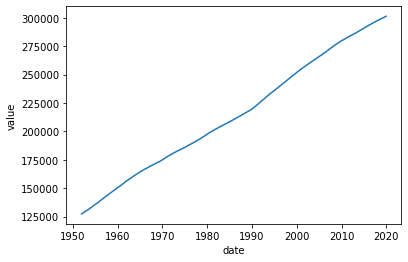

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(y="value",x="date",data=pop_df)
plt.show()
#alongwith time, population is also increasing, this trend shows a linear relationship

In [50]:
#Population will increase for the next 6 monts